In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [2]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
# Load in the data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# 'data' (the attribute) means the input data
data.data.shape

(569, 30)

In [6]:
# the meaning of the 0/1 target
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
#  the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [9]:
# Scale the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Build the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [11]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

2021-10-31 09:45:13.048851: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
12/12 [==============================] - 1s 21ms/step - loss: 1.0693 - accuracy: 0.3832 - val_loss: 1.1212 - val_accuracy: 0.3777
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9642 - accuracy: 0.4173 - val_loss: 1.0108 - val_accuracy: 0.4149
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8669 - accuracy: 0.4672 - val_loss: 0.9119 - val_accuracy: 0.4521
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7811 - accuracy: 0.5092 - val_loss: 0.8234 - val_accuracy: 0.5000
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7050 - accuracy: 0.5774 - val_loss: 0.7467 - val_accuracy: 0.5532
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6411 - accuracy: 0.6194 - val_loss: 0.6792 - val_accuracy: 0.6117
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5863 - accuracy: 0.6798 - val_loss: 0.6203 - val_accuracy: 0.6596
Epoch 8/100


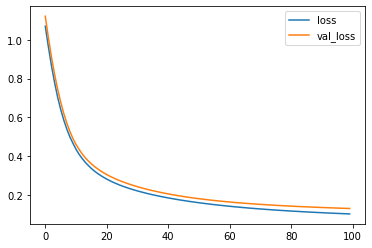

In [12]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

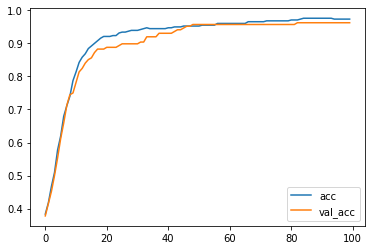

In [13]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [14]:
# Make predictions
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

[[8.5278249e-01]
 [9.6395218e-01]
 [4.1881713e-06]
 [9.6658123e-01]
 [9.8880041e-01]
 [9.3668103e-03]
 [6.1360300e-03]
 [9.6410191e-01]
 [9.8316932e-01]
 [9.9377298e-01]
 [2.4918616e-03]
 [3.1002760e-03]
 [5.7344586e-02]
 [8.5476828e-01]
 [9.9203432e-01]
 [5.3754300e-02]
 [9.9971843e-01]
 [5.9538335e-01]
 [1.8803239e-02]
 [1.0946989e-03]
 [8.7201452e-01]
 [9.0797770e-01]
 [9.9676871e-01]
 [5.1397890e-02]
 [9.3072939e-01]
 [8.2914913e-01]
 [9.0436637e-01]
 [3.1080455e-02]
 [4.7453642e-03]
 [6.5373850e-01]
 [9.9833310e-01]
 [6.3651800e-03]
 [9.8287749e-01]
 [9.8368835e-01]
 [9.3634200e-01]
 [6.6066384e-03]
 [8.1777549e-01]
 [9.8739552e-01]
 [9.2578053e-01]
 [9.9379706e-01]
 [1.4384088e-01]
 [2.9066205e-04]
 [9.8210508e-01]
 [9.9719375e-01]
 [5.3137837e-06]
 [9.7569263e-01]
 [9.9588394e-01]
 [4.0532649e-03]
 [9.8674321e-01]
 [8.5498905e-01]
 [2.1757007e-02]
 [9.6905661e-01]
 [9.9789584e-01]
 [4.6700239e-04]
 [3.4056658e-01]
 [9.4295621e-01]
 [9.8540592e-01]
 [1.4104971e-01]
 [1.0131788e-0

In [15]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)

P = np.round(P).flatten()
print(P)

[1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.]


In [16]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9627659574468085
6/6 [==============================] - 0s 1ms/step - loss: 0.1300 - accuracy: 0.9628
Evaluate output: [0.12995898723602295, 0.9627659320831299]
